## Chronic Kidney Disease Prediction

### Packages import and Data Loading

In [61]:
# !pip install skimpy
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.4 MB/s eta 0:00:00


In [109]:
# necessary import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import skimpy

import warnings
warnings.filterwarnings('ignore')

# plt.style.use('fivethirtyeight')
%matplotlib inline
# pd.set_option('display.max_columns', 26)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# load data
DATASET_PATH = '/content/drive/MyDrive/ML/input/kidney_disease/kidney_disease.csv'
df = pd.read_csv(DATASET_PATH)
df.drop('id', axis = 1, inplace = True)

In [37]:
# make data more readable
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


### Preprocess and EDA

In [17]:
# df.describe()
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 400    │ │ string      │ 14    │                                                          │
│ │ Number of columns │ 25     │ │ float64     │ 11    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean    ┃ sd        ┃ p0    ┃ p25  ┃ p50   ┃ p75  ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ age                    │   9 │   2.25 │   51.48 │     17.17 │     2 │   42 │    55 │ 64.5 │    90 │ ▁▂▅▇▇▁ │  │
│ │ blood_pressure         │  12 │      3 │   76.47 │     13.68 │    50 │   70 │    80 │   80 │   180 │  ▇▇▁   │  │
│ │ specific_gravity       │  47 │  11.75 │   1.017 │  0.005717 │ 1.005 │ 1.01 │  1.02 │ 1.02 │ 1.025 │ ▁▆ ▆▇▆ │  │
│ │ albumin                │  46 │   11.5 │   1.017 │     1.353 │     0 │    0 │     0 │    2 │     5 │ ▇▂▂▂▁  │  │
│ │ sugar                  │  49 │  12.25 │  0.4501 │     1.099 │     0 │    0 │     0 │    0 │     5 │   ▇    │  │
│ │ blood_glucose_random   │  44 │     11 │     148 │     79.28 │    22 │   99 │   121 │  163 │   490 │  ▃▇▂▁  │  │
│ │ blood_urea             │  19 │   4.75 │   57.43 │      50.5 │   1.5 │   27 │    42 │   66 │   391 │  ▇▂▁   │  │
│ │ serum_creatinine       │  17 │   4.25 │   3.072 │     5.741 │   0.4 │  0.9 │   1.3 │  2.8 │    76 │   ▇    │  │
│ │ sodium                 │  87 │  21.75 │   137.5 │     10.41 │   4.5 │  135 │   138 │  142 │   163 │     ▅▇ │  │
│ │ potassium              │  88 │     22 │   4.627 │     3.194 │   2.5 │  3.8 │   4.4 │  4.9 │    47 │   ▇    │  │
│ │ haemoglobin            │  52 │     13 │   12.53 │     2.913 │   3.1 │ 10.3 │ 12.65 │   15 │  17.8 │  ▁▅▇▇▅ │  │
│ └────────────────────────┴─────┴────────┴─────────┴───────────┴───────┴──────┴───────┴──────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ red_blood_cells                     │     152 │         38 │                    0.62 │                 248 │  │
│ │ pus_cell                            │      65 │      16.25 │                    0.84 │                 335 │  │
│ │ pus_cell_clumps                     │       4 │          1 │                    0.99 │                 396 │  │
│ │ bacteria                            │       4 │          1 │                    0.99 │                 396 │  │
│ │ packed_cell_volume                  │      70 │       17.5 │                    0.82 │                 330 │  │
│ │ white_blood_cell_count              │     105 │      26.25 │                    0.74 │                 295 │  │
│ │ red_blood_cell_count                │     130 │     

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count'  are object type. We need to change them to numerical dtype.

In [38]:
# converting necessary columns to numerical type
# this object is string
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [39]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [40]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [41]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})



In [42]:
# double check
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has ['ckd' 'not ckd'] values



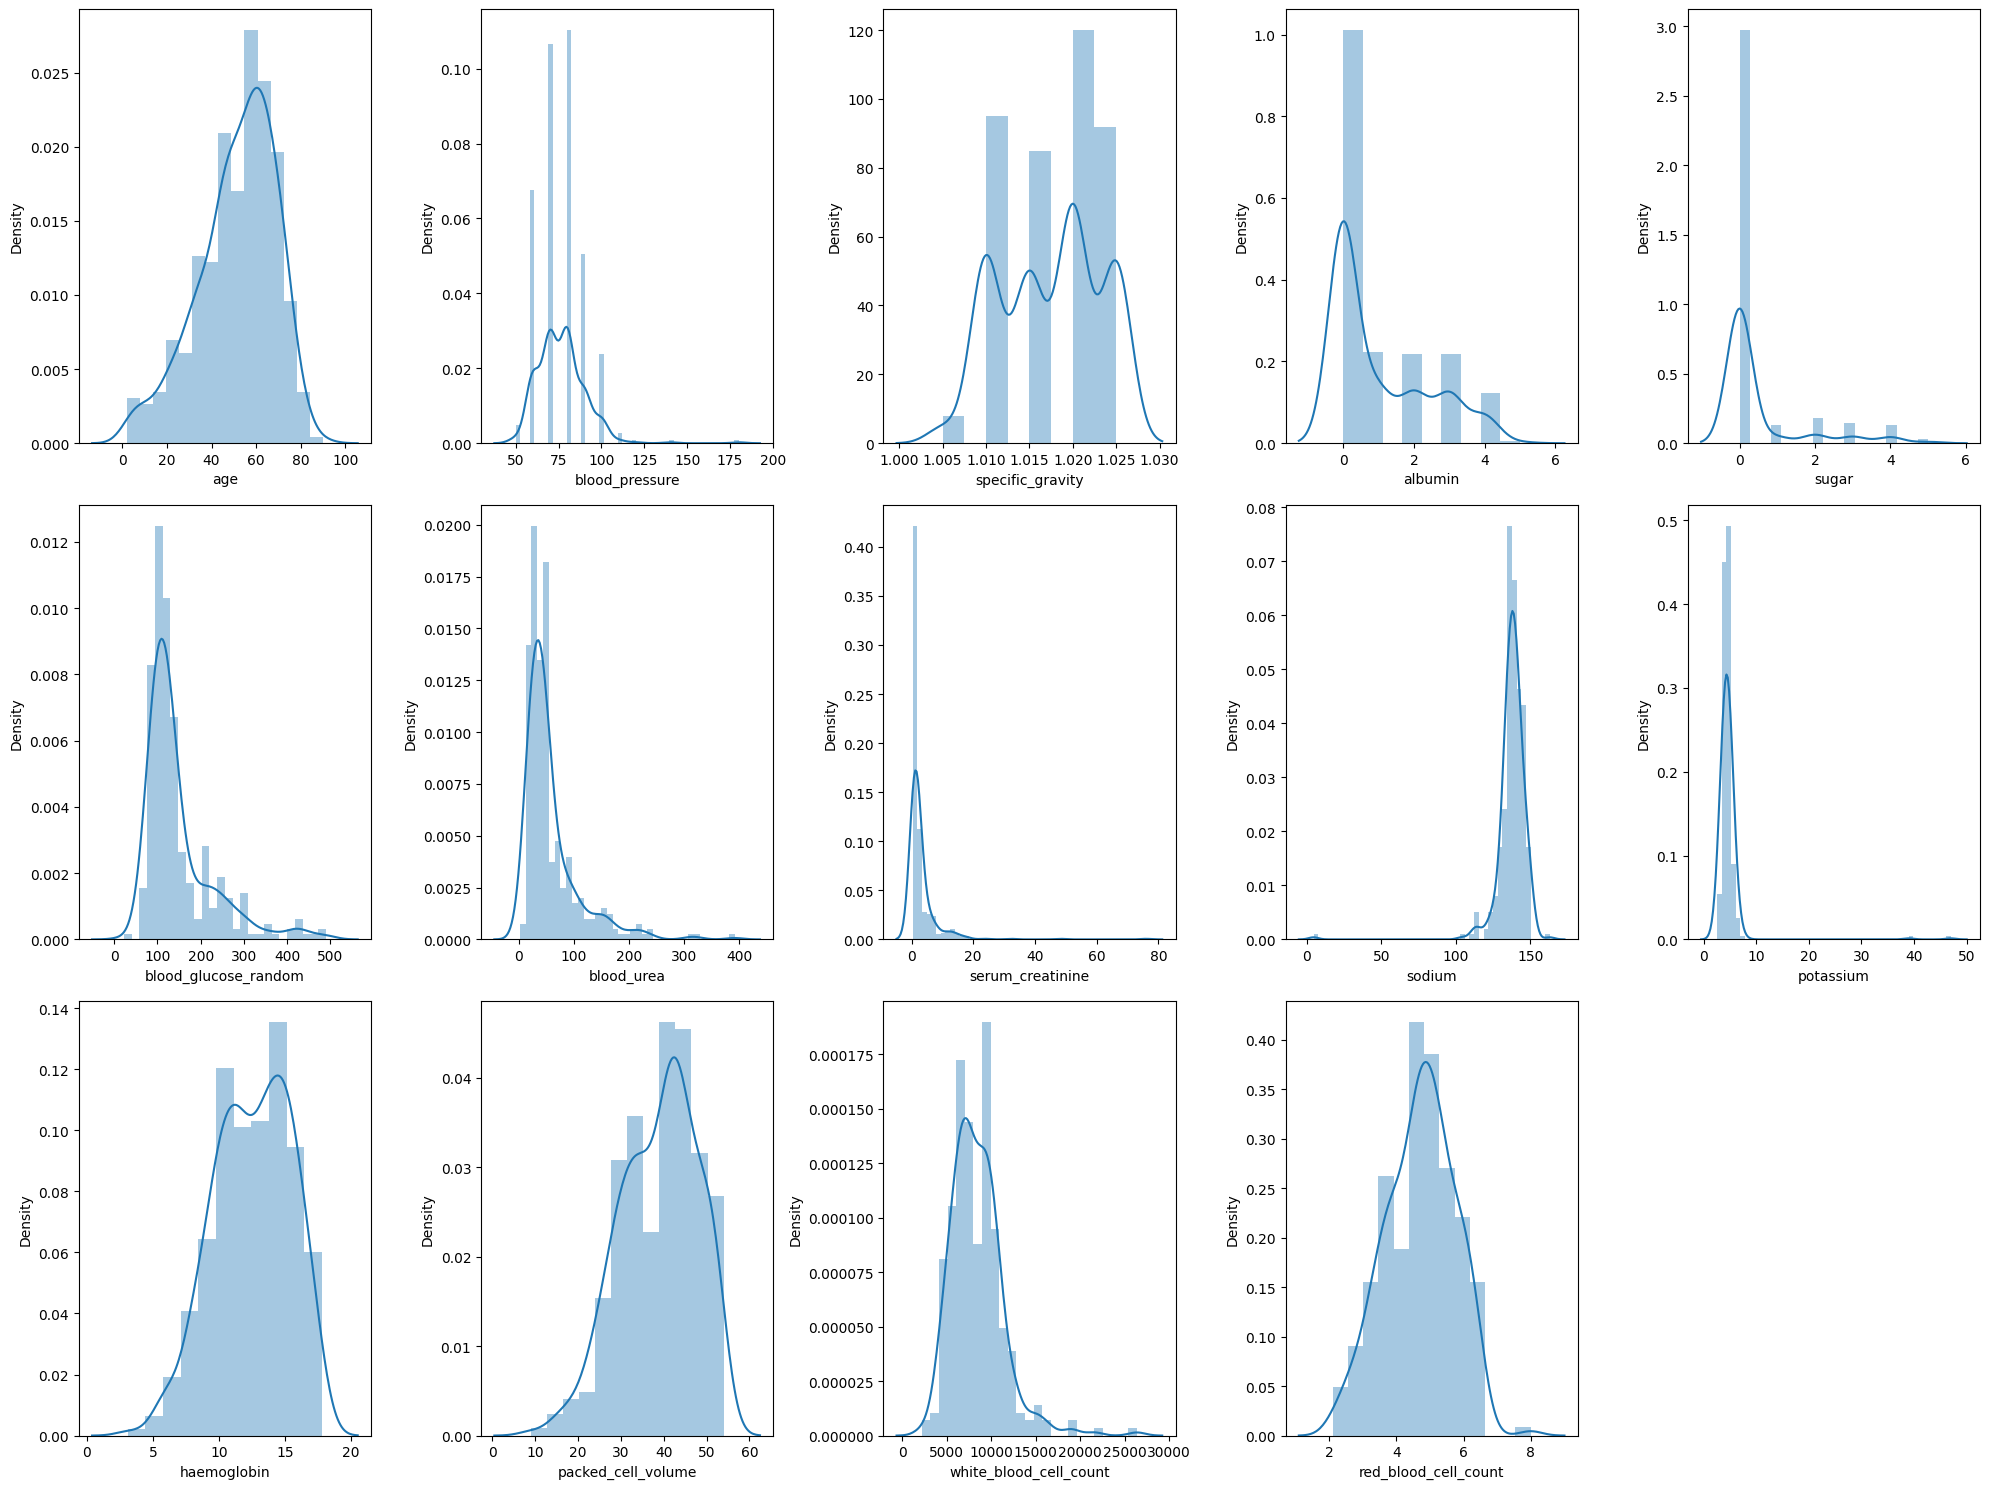

In [25]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

Skewness is present in some of the columns.

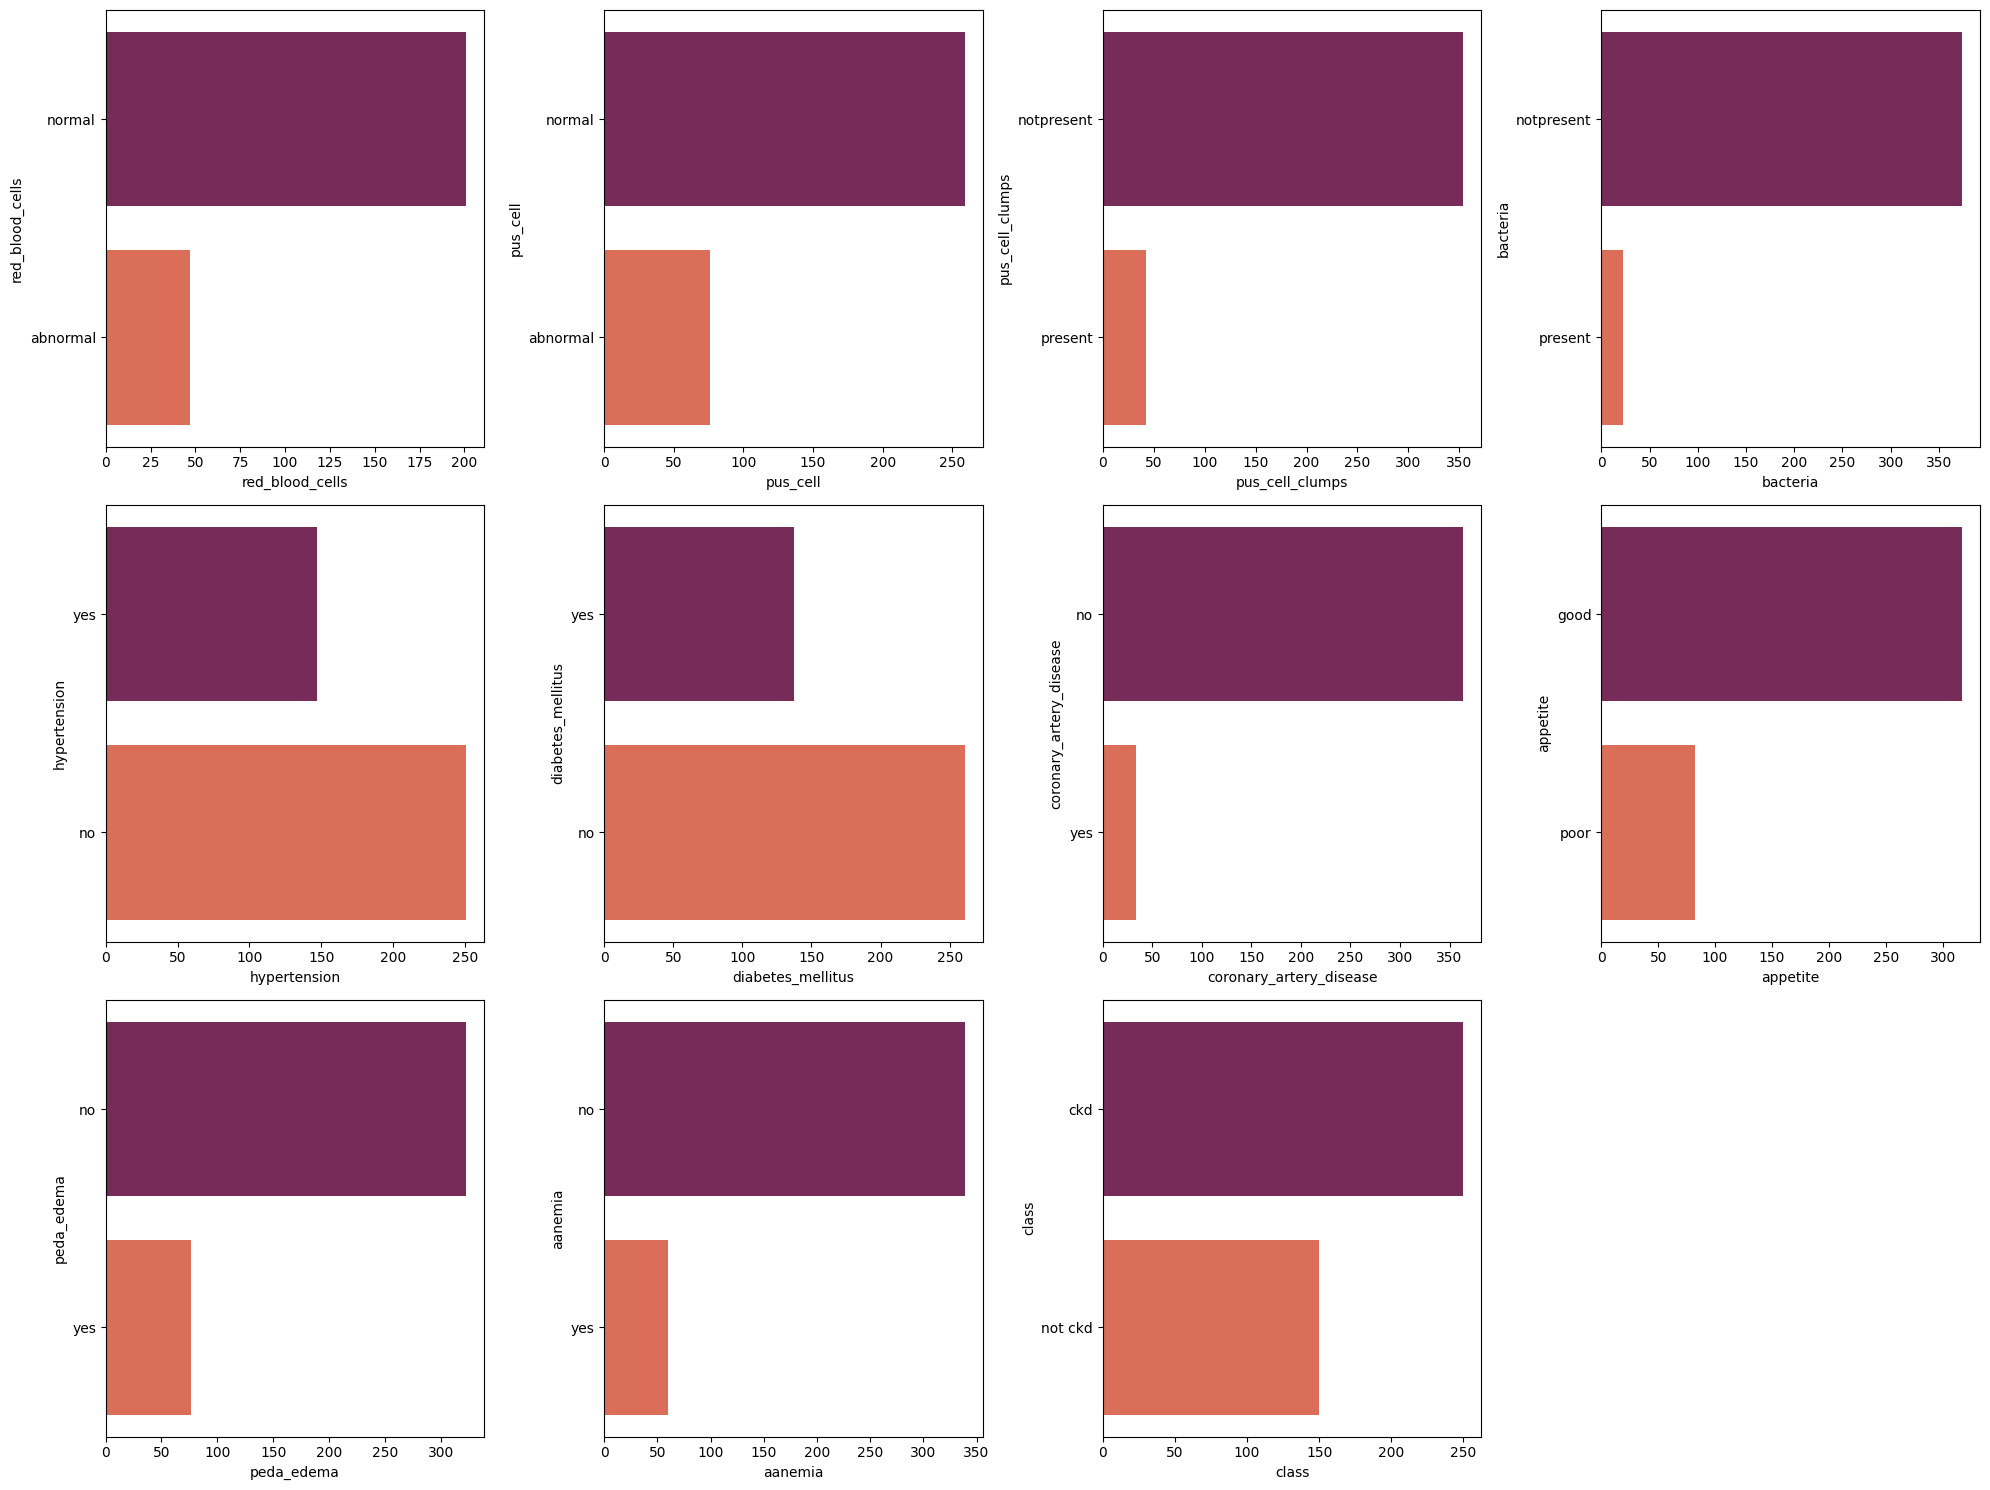

In [43]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:

    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [44]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

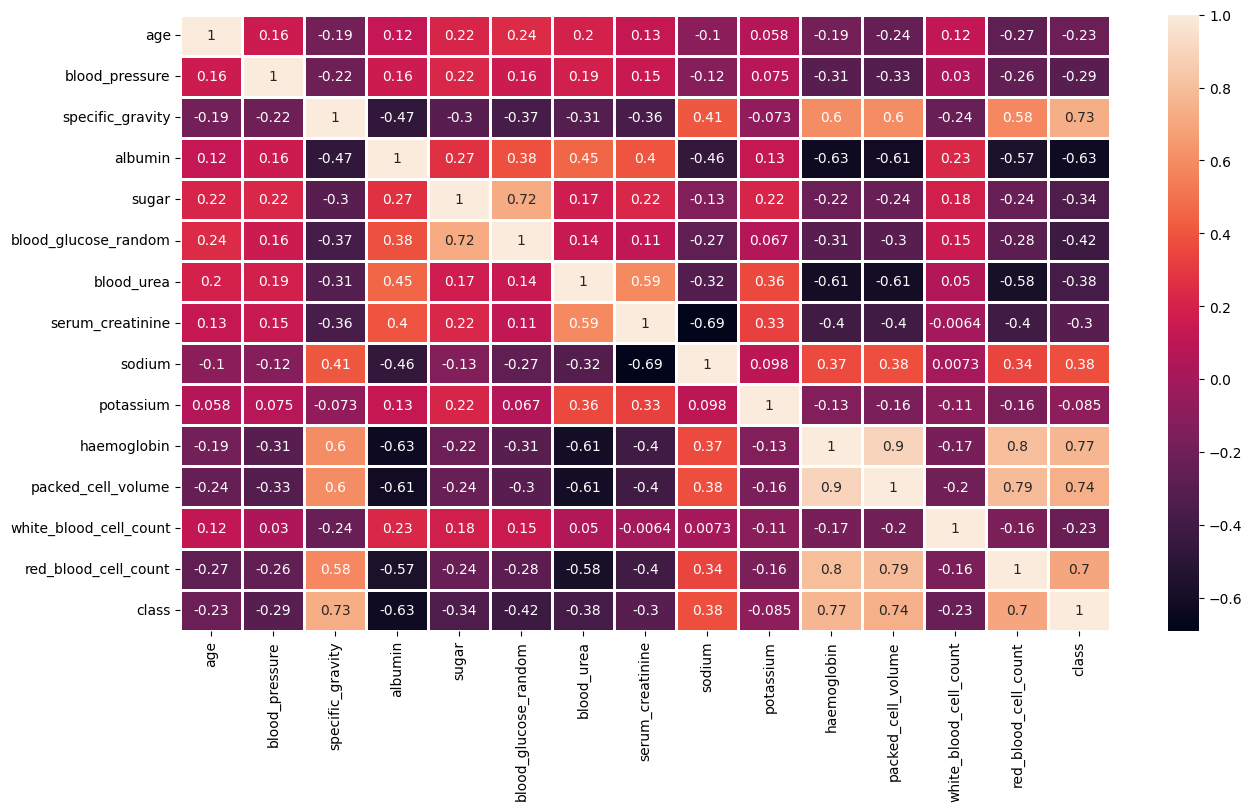

In [50]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols+['class']].corr(), annot = True, linewidths = 2, linecolor = 'white')
plt.show()

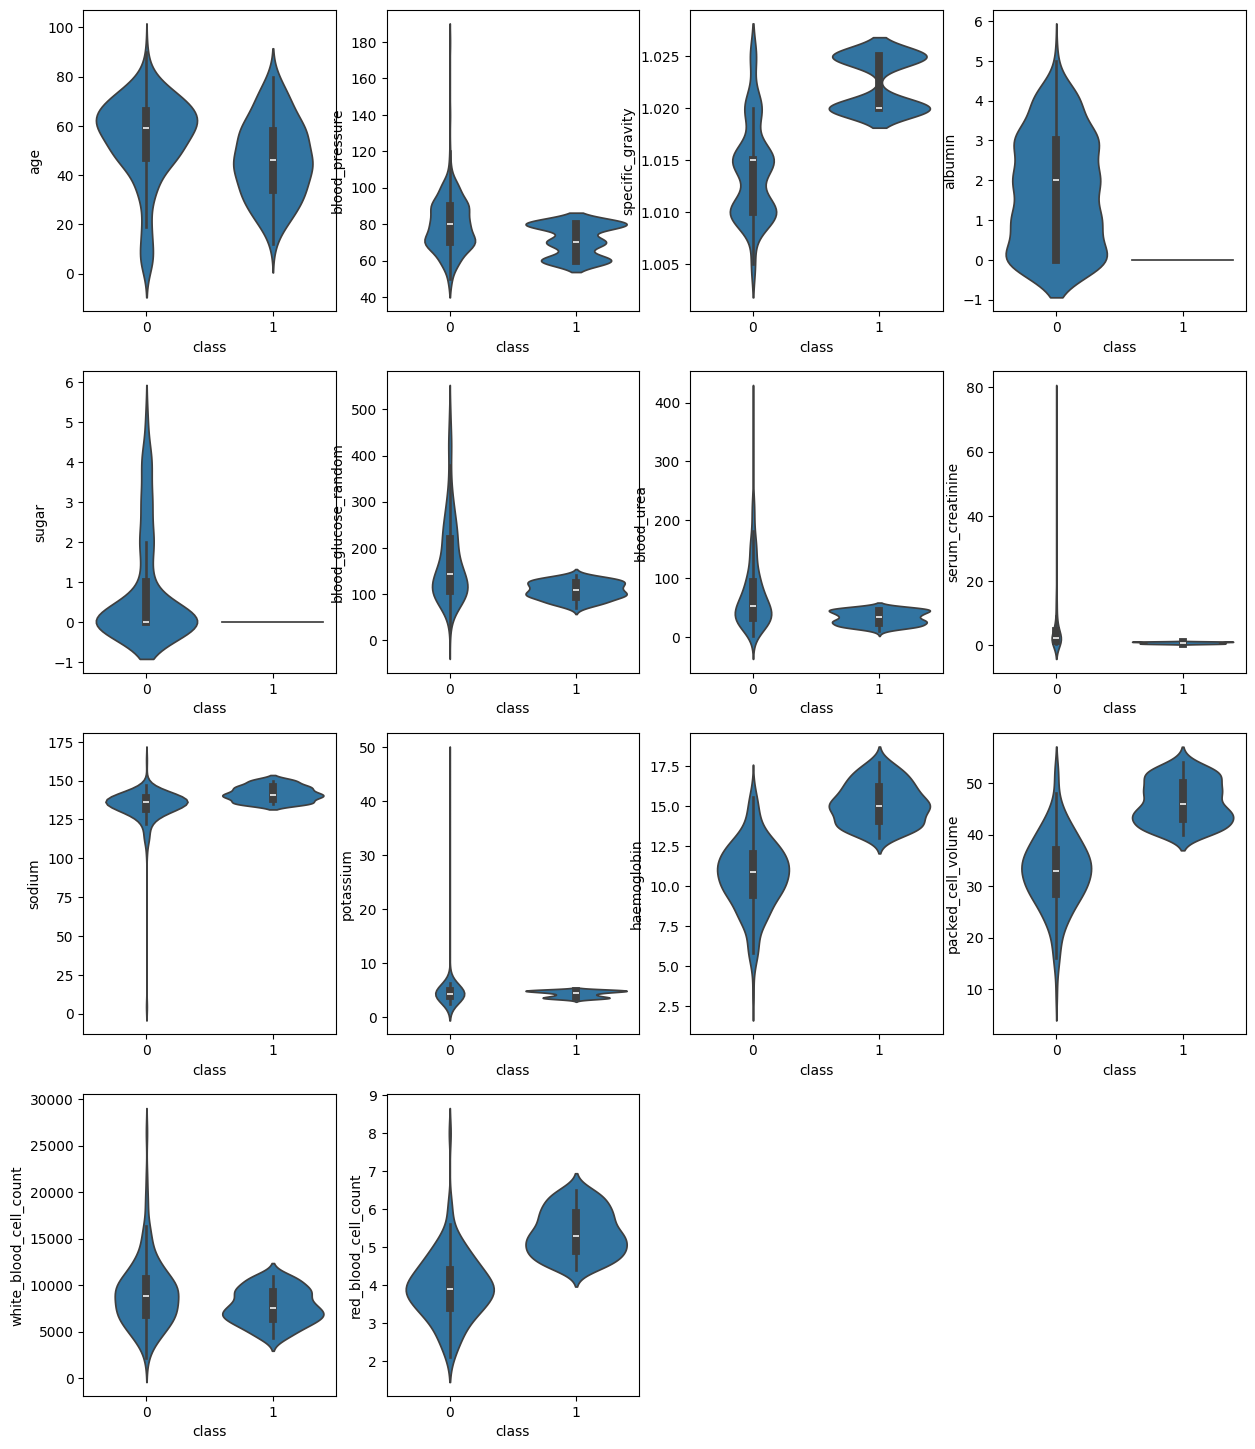

In [52]:
# look at violinplot

plt.figure(figsize=(15,18))
for i, col in enumerate(num_cols):
    ax=plt.subplot(4,4,i+1)
    sns.violinplot(x='class', y= col, data = df, ax=ax)


#### null data handling

In [53]:
# sort the columns with number of null data
df.isnull().sum().sort_values(ascending=False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [55]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

df[num_cols].isnull().sum()

In [57]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

df[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


#### Feature Encoding

In [58]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [60]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,139.0,4.9,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,114.0,18.0,0.8,133.0,3.5,11.3,38.0,6000.0,5.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,139.0,3.9,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,137.0,3.8,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


#### Split data

In [63]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

# splitting data intp training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

### Pipeline and Model Building

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
# Initialize models
models = {
  'DecisionTreeClassfier': DecisionTreeClassifier(),
  'RandomForestClassifier': RandomForestClassifier(),
  'AdaBoostClassifier': AdaBoostClassifier(),
  'GradientBoostingClassifier': GradientBoostingClassifier(),
  'XGBClassifier': XGBClassifier(),
  'CatBoostClassifier': CatBoostClassifier(verbose=0),
  'ExtraTreesClassifier': ExtraTreesClassifier(),
  'LGBMClassifier': LGBMClassifier(verbosity=-1),
  'KNeighborsClassifier': KNeighborsClassifier()
}

# Initialize list to hold Confusion Matrix results
cm_results = []

# Train, predict, and calculate Confusion Matrix for each model
for model_name, model in models.items():
    # Create a pipeline with standard scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on validation set
    pred_val = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, pred_val)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, pred_val)

    # Append results
    cm_results.append({'Model': model_name,'Accuracy':accuracy, 'Confusion Matrix': cm})

# Convert results to DataFrame for better readability
cm_df = pd.DataFrame(cm_results)

# Format Accuracy to 5 decimal places
cm_df['Accuracy'] = cm_df['Accuracy'].apply(lambda x: f"{x:.5f}")

# Sort by Confusion Matrix
cm_df = cm_df.sort_values(by='Accuracy', ascending = False)

print("Results for Each Model:")
print(cm_df)

Results for Each Model:
                        Model Accuracy    Confusion Matrix
1      RandomForestClassifier  1.00000  [[76, 0], [0, 44]]
6        ExtraTreesClassifier  1.00000  [[76, 0], [0, 44]]
2          AdaBoostClassifier  0.99167  [[75, 1], [0, 44]]
3  GradientBoostingClassifier  0.98333  [[74, 2], [0, 44]]
4               XGBClassifier  0.98333  [[74, 2], [0, 44]]
5          CatBoostClassifier  0.98333  [[74, 2], [0, 44]]
7              LGBMClassifier  0.98333  [[74, 2], [0, 44]]
0       DecisionTreeClassfier  0.96667  [[73, 3], [1, 43]]
8        KNeighborsClassifier  0.95833  [[72, 4], [1, 43]]


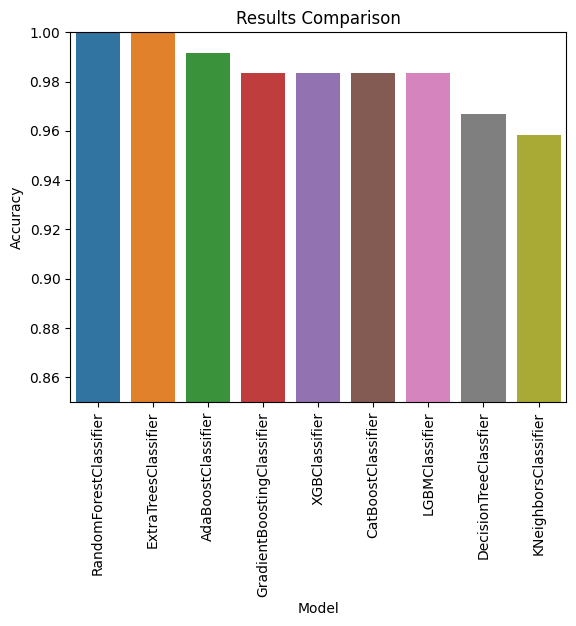

In [129]:
# results comparison
result_df = {'Model': (cm_df['Model']),
        'Accuracy': [float(i) for i in cm_df['Accuracy']]}
result_df = pd.DataFrame(result_df)

sns.barplot(data = result_df, x = 'Model', y = 'Accuracy', hue='Model')
plt.tick_params(axis='x', rotation=90)
plt.title('Results Comparison')
plt.ylim(0.85, 1)
plt.show()